# Cours 4 - Dictionnaires & Fichiers

## Rappel du plan du cursus

__Cours 1__ : Variables, boucles et conditions

__Cours 2__ : Listes

__Cours 3__ : Fonctions

__Cours 4__ : Dictionnaires & Fichiers

__Cours 5__ : Votre premier programme

## Rappel des outils

*Pour suivre le cours en codant en temps réel*

- https://www.online-python.com/
- https://repl.it/ (plus complet mais nécessite la création d'un compte, ou l'utilisation d'un compte Google / Facebook)

# Les dictionnaires en Python

__Le dictionnaire en Python est une structure de données :__
- qui permet de stocker des couples "clé", "valeur" (voir la clé comme une étiquette sur une boîte)
- permettant ainsi d'accéder très rapidement à une valeur si l'on connaît sa clé
- ce qui est dans certains cas plus pratique qu'une liste dont les indices sont forcément des nombres entiers

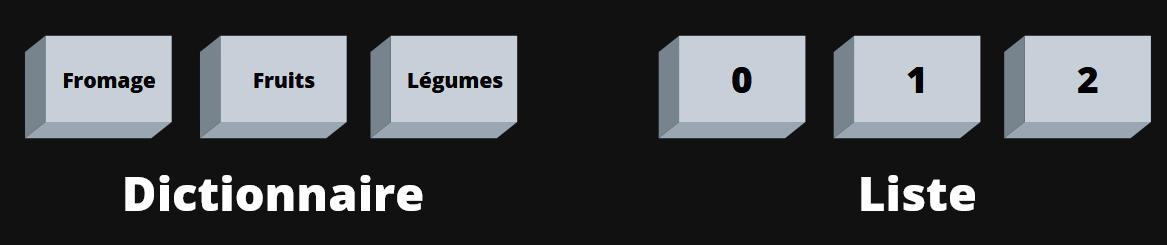

## Exemple de dictionnaire

In [1]:
garde_manger = {
    "Fromage": ["Comté", "Roquefort"],
    "Fruits": ["Pomme", "Poire"],
    "Légumes": ["Poireau", "Carotte"],
}

garde_manger["Fromage"]

['Comté', 'Roquefort']

In [2]:
rangement = {}
rangement["tiroir"] = "chausettes"
rangement["placard"] = ["costumes", "chemises"]
rangement

{'tiroir': 'chausettes', 'placard': ['costumes', 'chemises']}

## Manipuler un dictionnaire : bases

In [3]:
for boîte in garde_manger:
    print(boîte)

Fromage
Fruits
Légumes


In [4]:
for contenu in garde_manger.values():
    print(contenu)

['Comté', 'Roquefort']
['Pomme', 'Poire']
['Poireau', 'Carotte']


In [5]:
for boîte, contenu in garde_manger.items():
    print(f"{boîte}: {contenu}")

Fromage: ['Comté', 'Roquefort']
Fruits: ['Pomme', 'Poire']
Légumes: ['Poireau', 'Carotte']


## Manipulations avancées

Obtenir une liste des clés ou valeurs d'un dictionnaire

In [6]:
list(garde_manger.keys())

['Fromage', 'Fruits', 'Légumes']

In [7]:
list(garde_manger.values())

[['Comté', 'Roquefort'], ['Pomme', 'Poire'], ['Poireau', 'Carotte']]

# Lire et écrire des fichiers

Par exemple pour:
- charger des données depuis un fichier texte ou CSV
- sauvegarder un état entre deux exécutions d'un programme (en l'absence de base de données)
- permettre à l'utilisateur de spécifier des paramètres de configuration.

In [10]:
# écriture
with open("mon_fichier.txt", "w") as sortie:
    sortie.write("toto")

In [11]:
# lecture, le second argument, "r" peut être omis
with open("mon_fichier.txt", "r") as entrée:
    contenu = entrée.read()
    print(contenu)

toto


## Ajouter des données à la fin d'un fichier

Sans l'écraser, contrairement au mode `"w"`

In [18]:
# ajout
with open("mon_fichier.txt", "a") as sortie:
    sortie.write("-titi")
    
with open("mon_fichier.txt") as entrée:
    print(entrée.read())

toto-titi-titi-titi-titi-titi-titi-titi


## Lire et écrire plusieurs lignes

In [19]:
prénoms = ["Pierre", "Paul", "Jacques"]

with open("prénoms.txt", "w") as sortie:
    for prénom in prénoms:
        sortie.write(prénom + "\n")

In [22]:
with open("prénoms.txt") as entrée:
    for ligne in entrée:
        print(ligne.strip())

Pierre
Paul
Jacques


In [23]:
with open("prénoms.txt") as entrée:
    print(entrée.readlines())

['Pierre\n', 'Paul\n', 'Jacques\n']


# Mise en pratique : fréquence des lettres

Compter le nombre de fois que chaque lettre apparaît dans un texte.

In [24]:
texte = """Maître Corbeau sur un arbre perché,
Tenait en son bec un fromage.
Maître Renard par l’odeur alléché
Lui tint à peu près ce langage :
Et bonjour, Monsieur du Corbeau.
Que vous êtes joli ! que vous me semblez beau !
Sans mentir, si votre ramage
Se rapporte à votre plumage,
Vous êtes le Phenix des hôtes de ces bois.
À ces mots le Corbeau ne se sent pas de joie :
Et pour montrer sa belle voix,
Il ouvre un large bec, laisse tomber sa proie.
Le Renard s’en saisit, et dit : Mon bon Monsieur,
Apprenez que tout flatteur
Vit aux dépens de celui qui l’écoute.
Cette leçon vaut bien un fromage sans doute.
Le Corbeau honteux et confus
Jura, mais un peu tard, qu’on ne l’y prendrait plus."""

with open("fable.txt", "w") as sortie:
    sortie.write(texte)

## Lire le fichier et compter les lettres

In [25]:
fréquences = {}

with open("fable.txt") as entrée:
    for ligne in entrée:
        for caractère in ligne.strip():
            lettre = caractère.lower()
            if lettre in fréquences:
                fréquences[lettre] += 1
            else:
                fréquences[lettre] = 1

fréquences

{'m': 16,
 'a': 37,
 'î': 2,
 't': 36,
 'r': 41,
 'e': 82,
 ' ': 113,
 'c': 15,
 'o': 37,
 'b': 15,
 'u': 41,
 's': 37,
 'n': 34,
 'p': 17,
 'h': 5,
 'é': 5,
 ',': 10,
 'i': 24,
 'f': 4,
 'g': 7,
 '.': 7,
 'd': 13,
 'l': 23,
 '’': 5,
 'à': 3,
 'è': 1,
 ':': 3,
 'j': 4,
 'q': 5,
 'v': 9,
 'ê': 2,
 '!': 2,
 'z': 2,
 'x': 4,
 'ô': 1,
 'ç': 1,
 'y': 1}

## Bonus : Top 10 des fréquences

Calculer le top 10 des lettres les plus utilisées

In [26]:
# supprimer l'espace qui apporte peu d'info
if " " in fréquences:
    fréquences.pop(" ")
    
# trier le dictionnaire
top_freq = dict(sorted(fréquences.items(), key=lambda item: item[1], reverse=True))

# séparer les lettres de leur fréquence, en gardant seulement le top 10
top_lettres = list(top_freq.keys())[:10]
top_valeurs = list(top_freq.values())[:10]

print(top_lettres)
print(top_valeurs)

['e', 'r', 'u', 'a', 'o', 's', 't', 'n', 'i', 'l']
[82, 41, 41, 37, 37, 37, 36, 34, 24, 23]


## Bonus 2 : Afficher un histogramme !

Voilà !


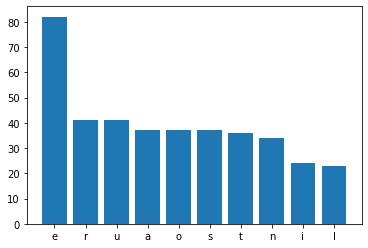

In [27]:
from matplotlib import pyplot as plt

plt.bar(top_lettres, top_valeurs)

print("Voilà !")